In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def onehot_to_str(label):
    """
    ワンホットベクトル形式のラベルをカタカナ文字に変換する
    """
    dic_katakana = {"a":0,"i":1,"u":2,"e":3,"o":4,"ka":5,"ki":6,"ku":7,"ke":8,"ko":9,"sa":10,"si":11,"su":12,"se":13,"so":14}
    label_int = np.argmax(label)
    for key, value in dic_katakana.items():
        if value==label_int:
            return key
    

# 画像読み込み
data = np.load("../1_data/train_data_w_pre_prcss.npy")  # パスは適宜変更すること
# data = data[:1]
label = np.load("../1_data/train_label_w_pre_prcss.npy")  # パスは適宜変更すること
label_copy = label.copy()
# label = label[:1]
# label = onehot_to_str(label)

print("data.shape=", data.shape)
print("label_copy.shape=", label_copy.shape)

data.shape= (2617, 1, 28, 28)
label_copy.shape= (2617, 15)


データをmatplotlibが出力できるようにする

In [3]:
train_data_image = data.reshape(2617, 28,28)
print(train_data_image.shape)

(2617, 28, 28)


In [4]:
vec_trans_id = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

label_id = np.dot(label_copy, vec_trans_id.T)

df = pd.DataFrame({'label_id':label_id})
display(df.head(5))
display(df.tail(5))

,label_id
0,13
1,13
2,13
3,13
4,13


,label_id
2612,3
2613,3
2614,3
2615,3
2616,3


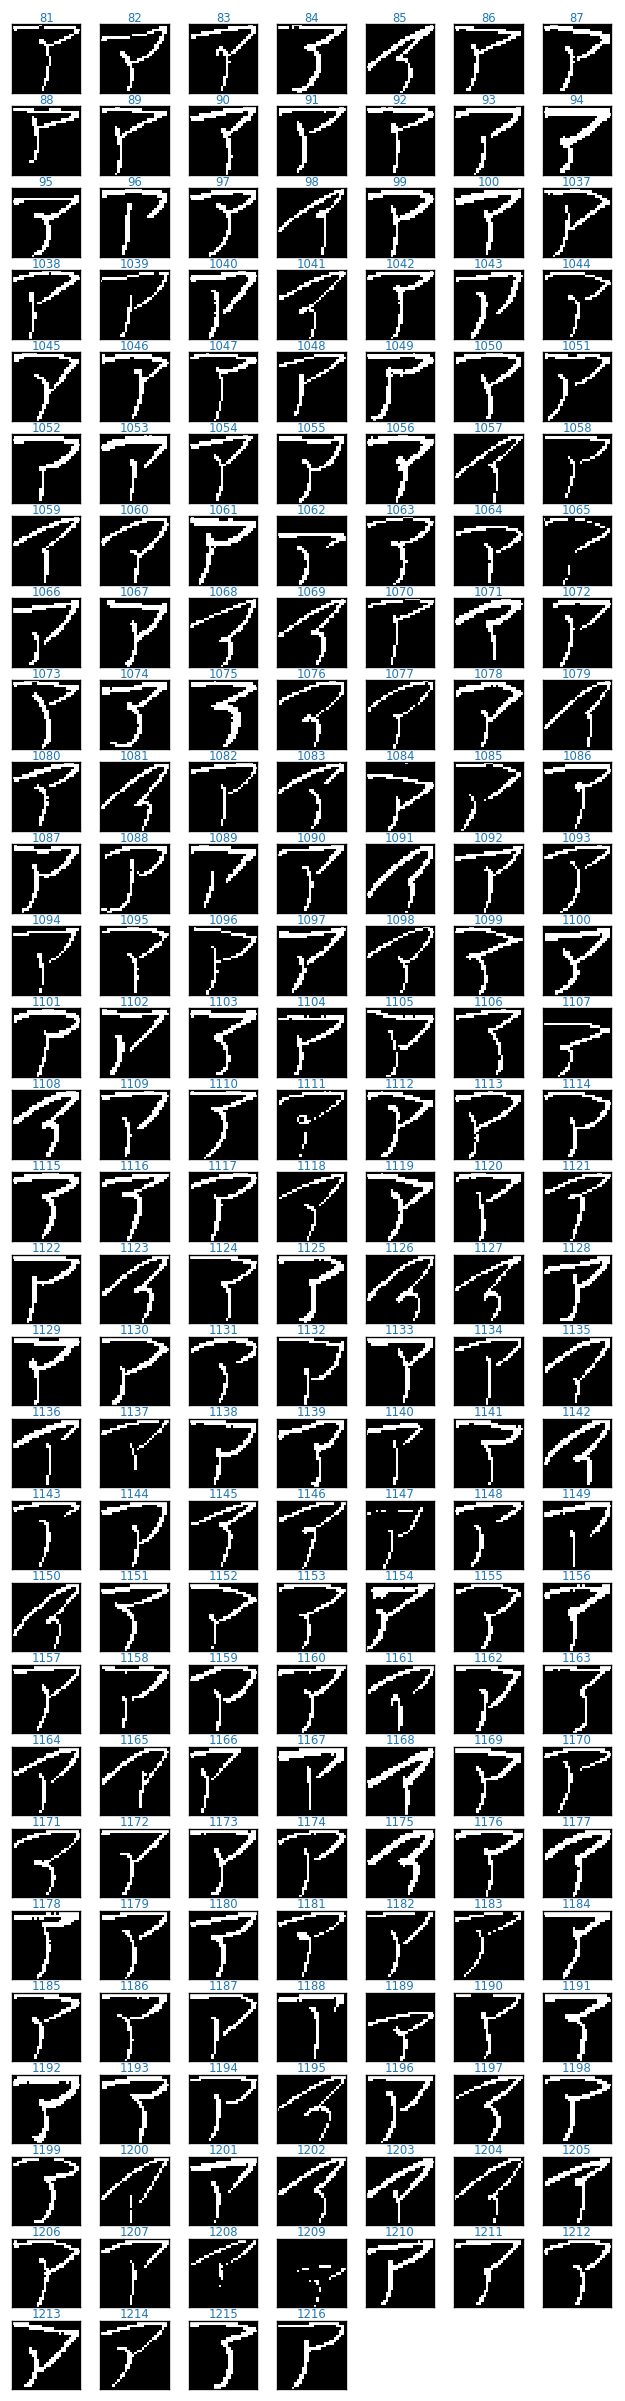

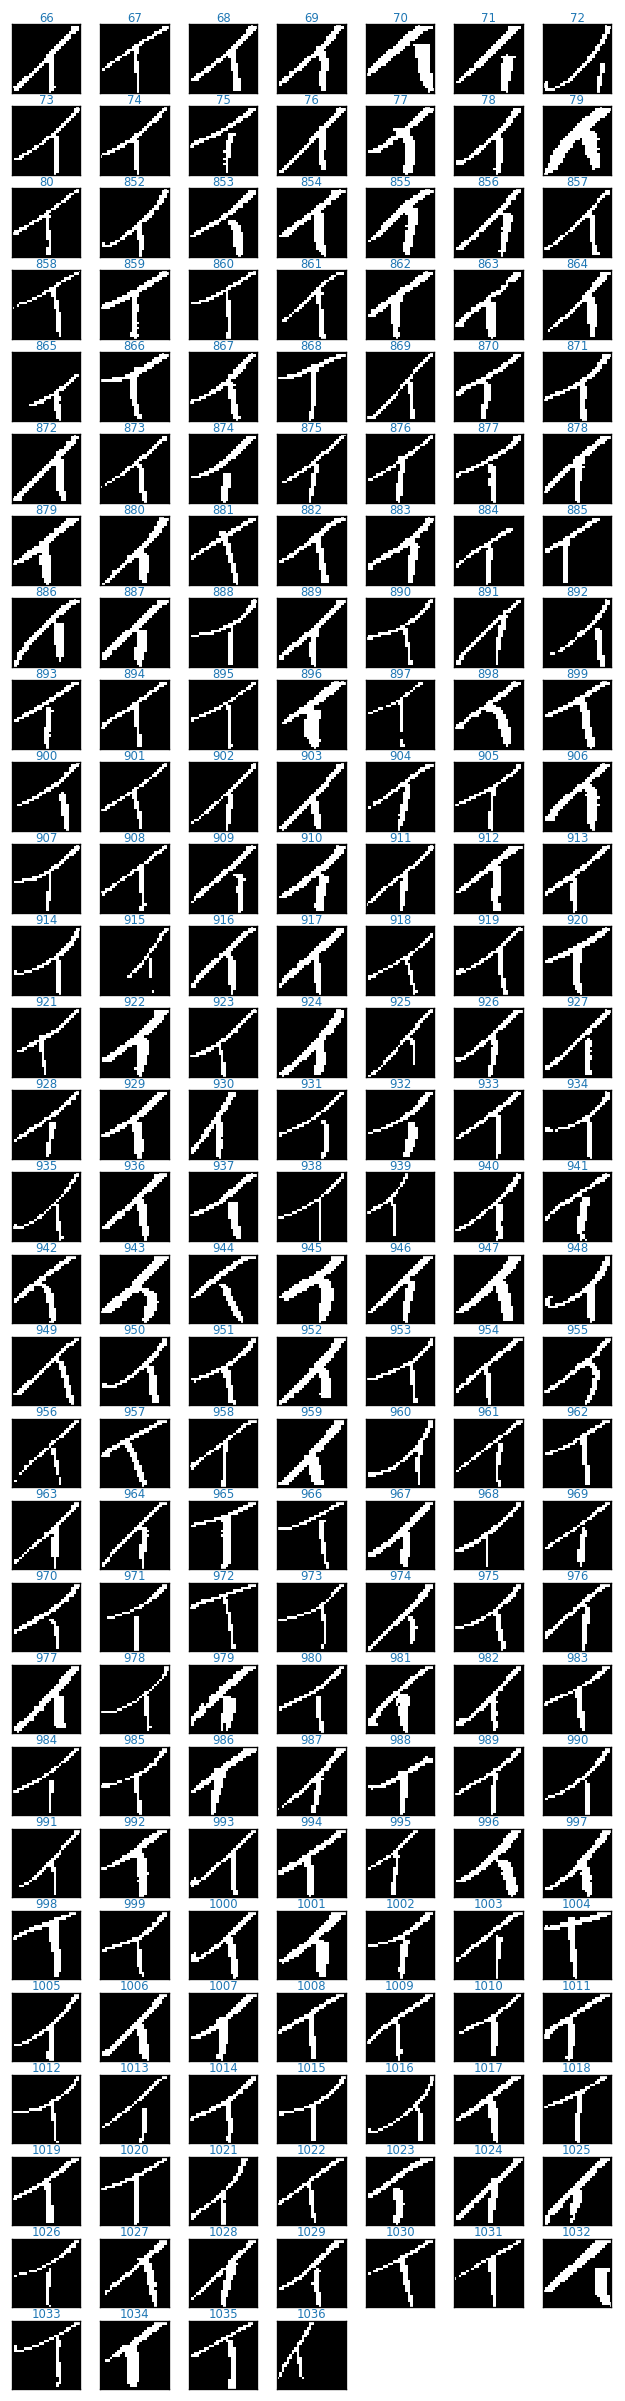

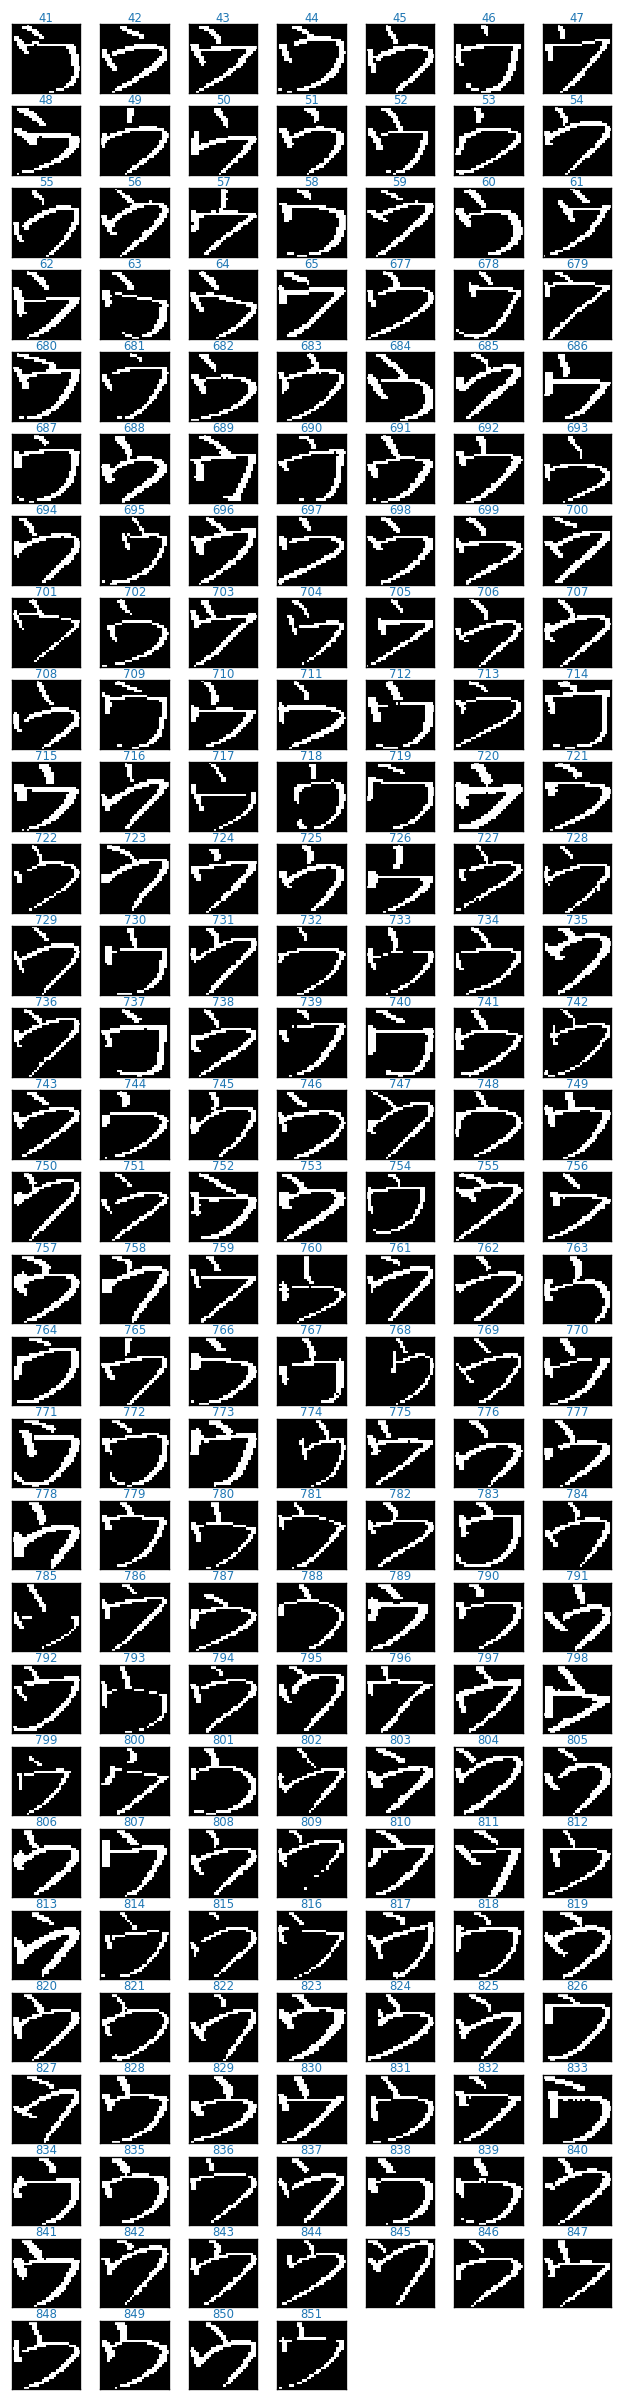

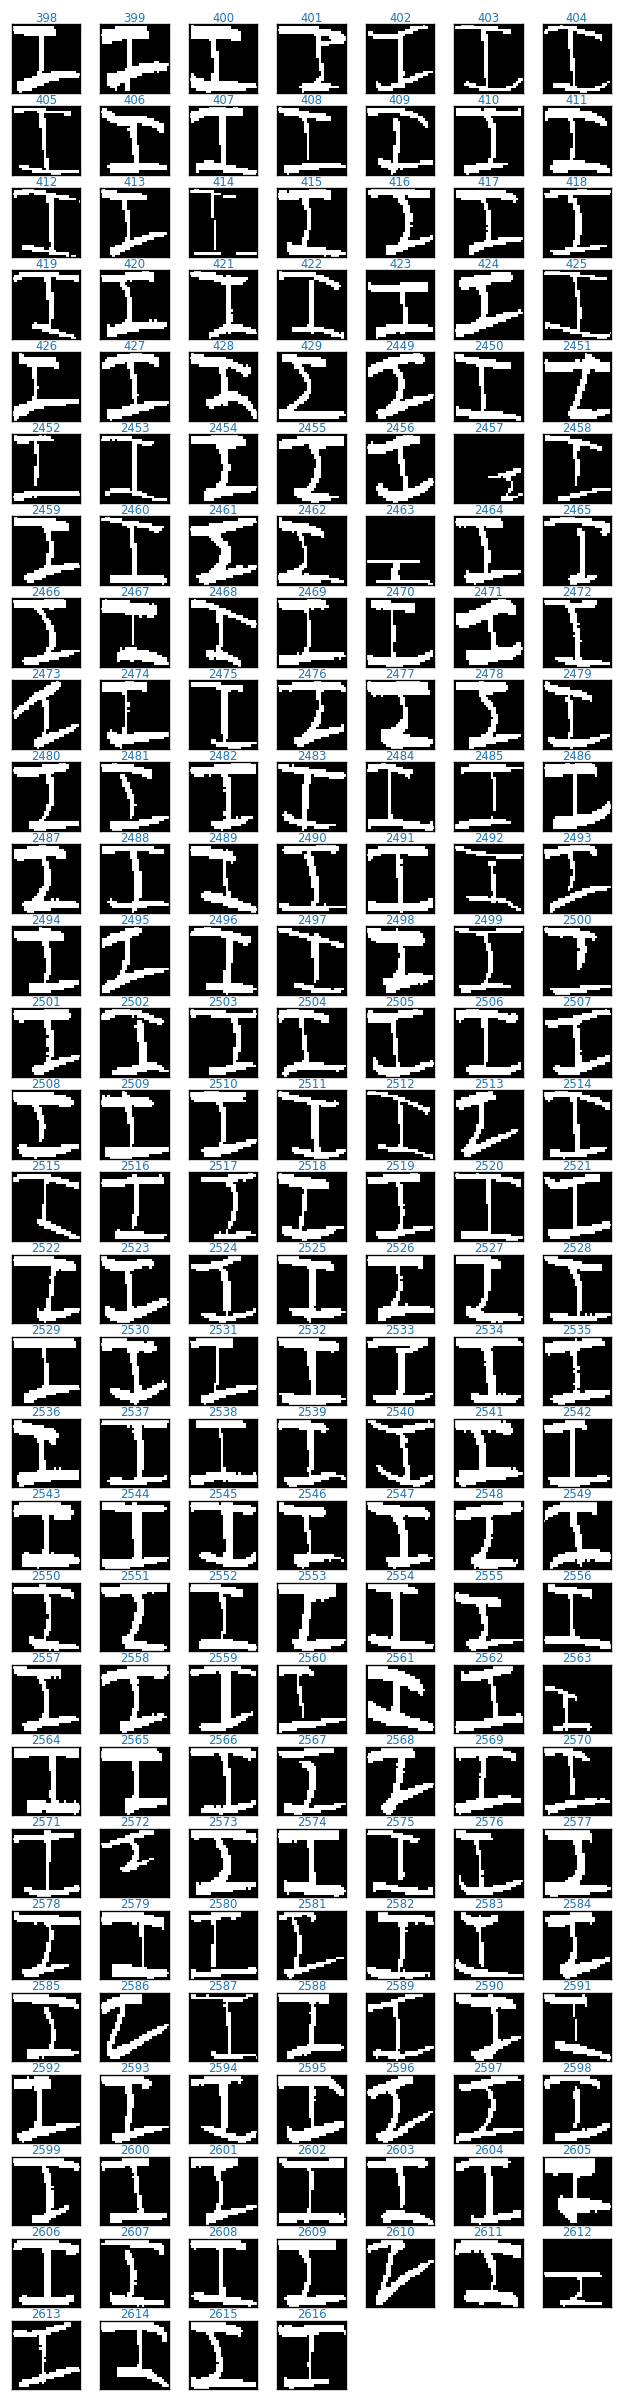

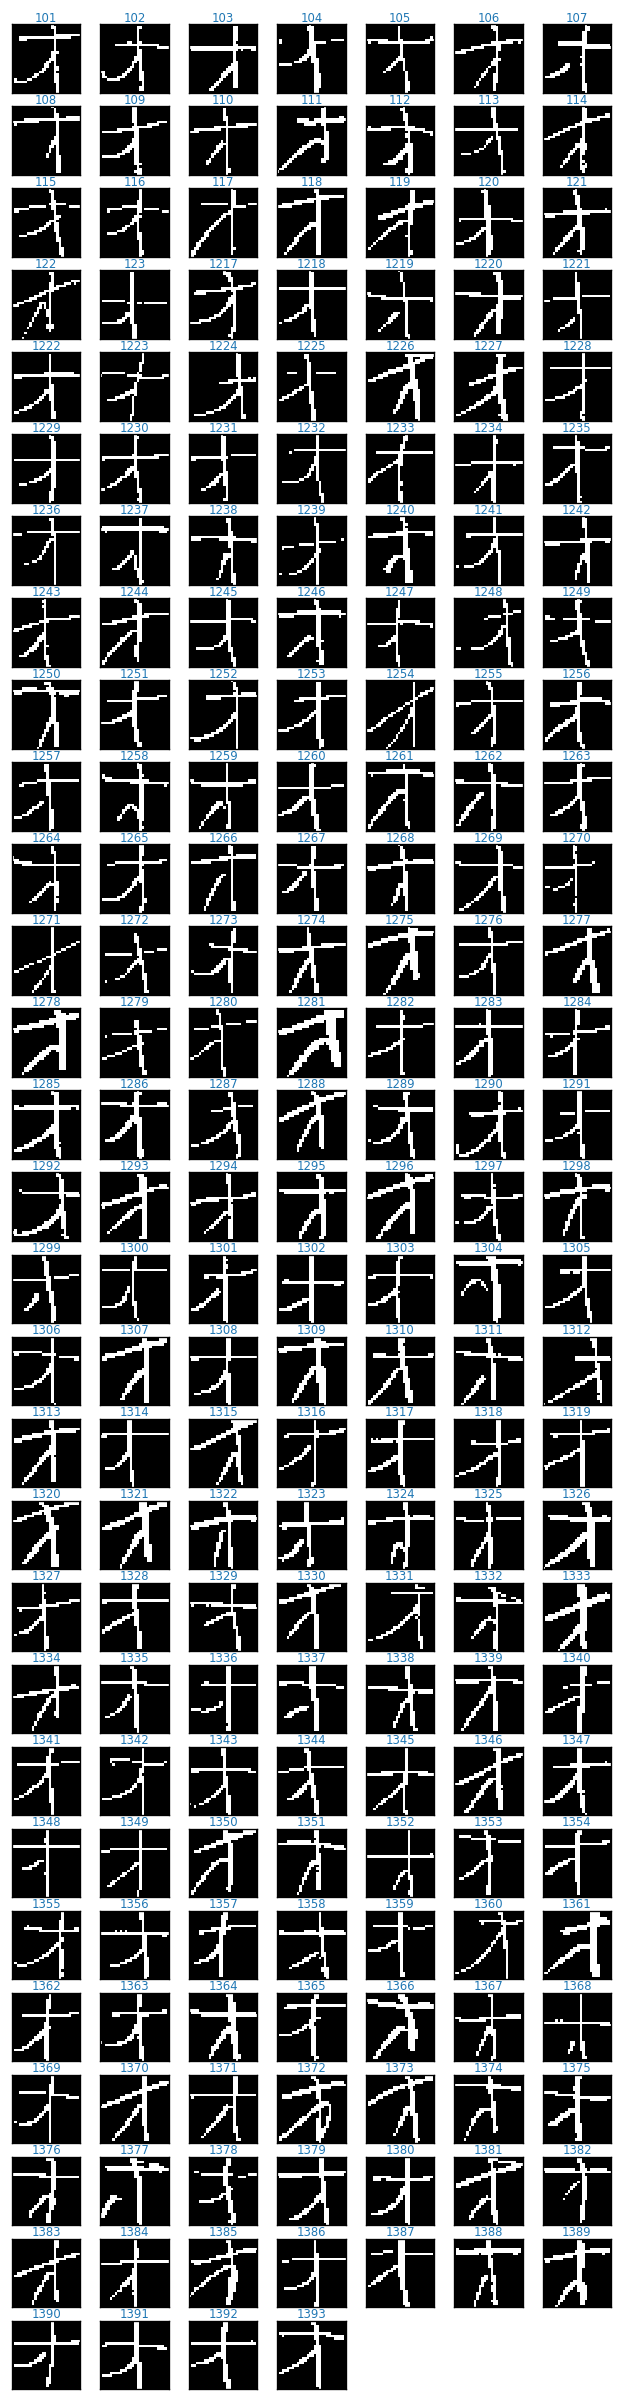

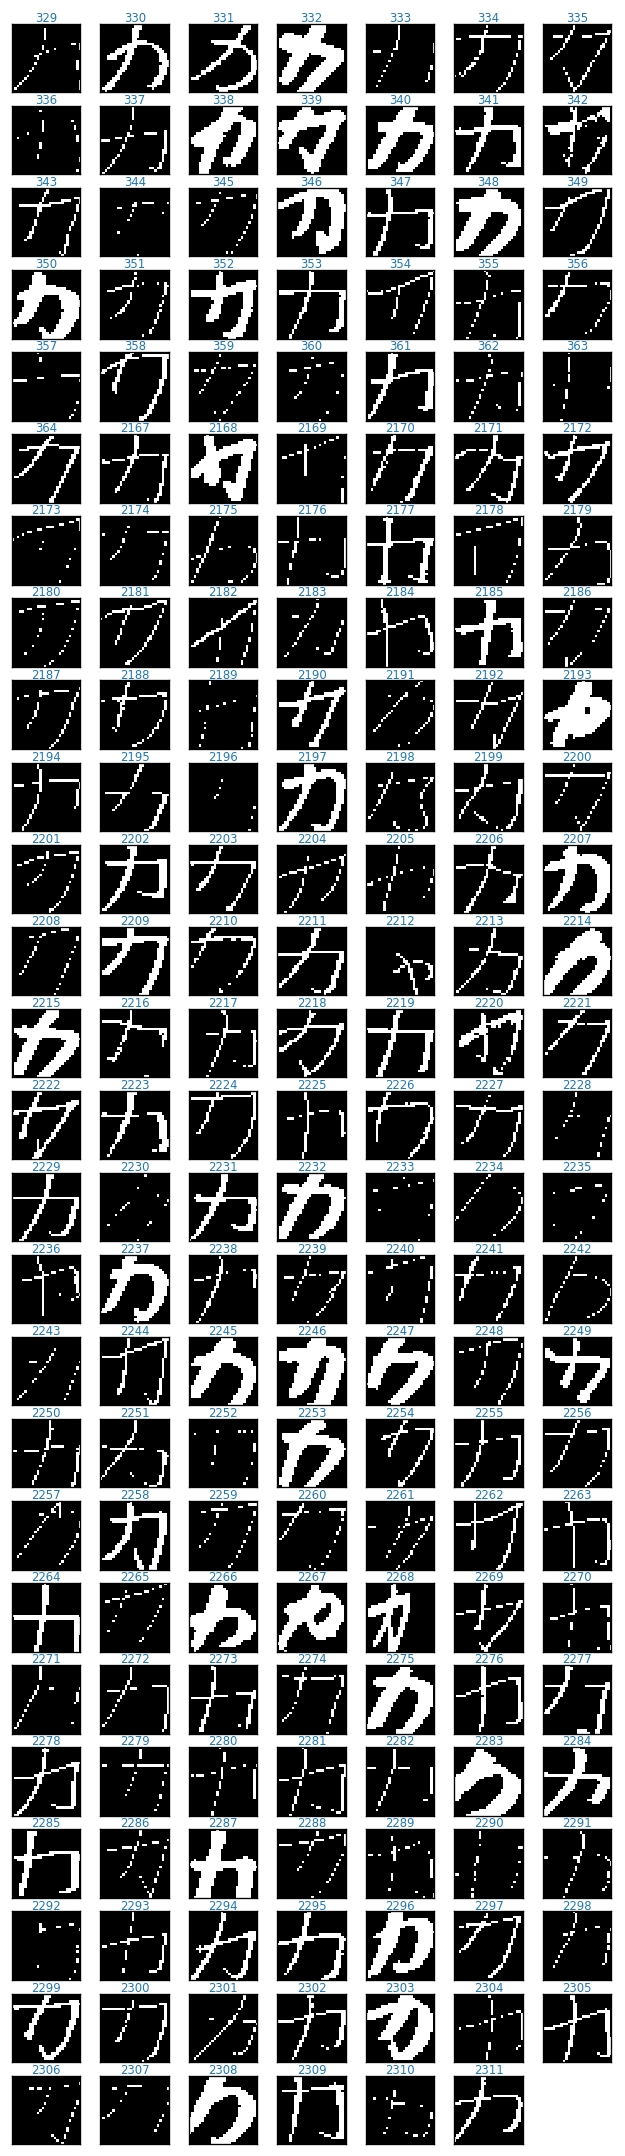

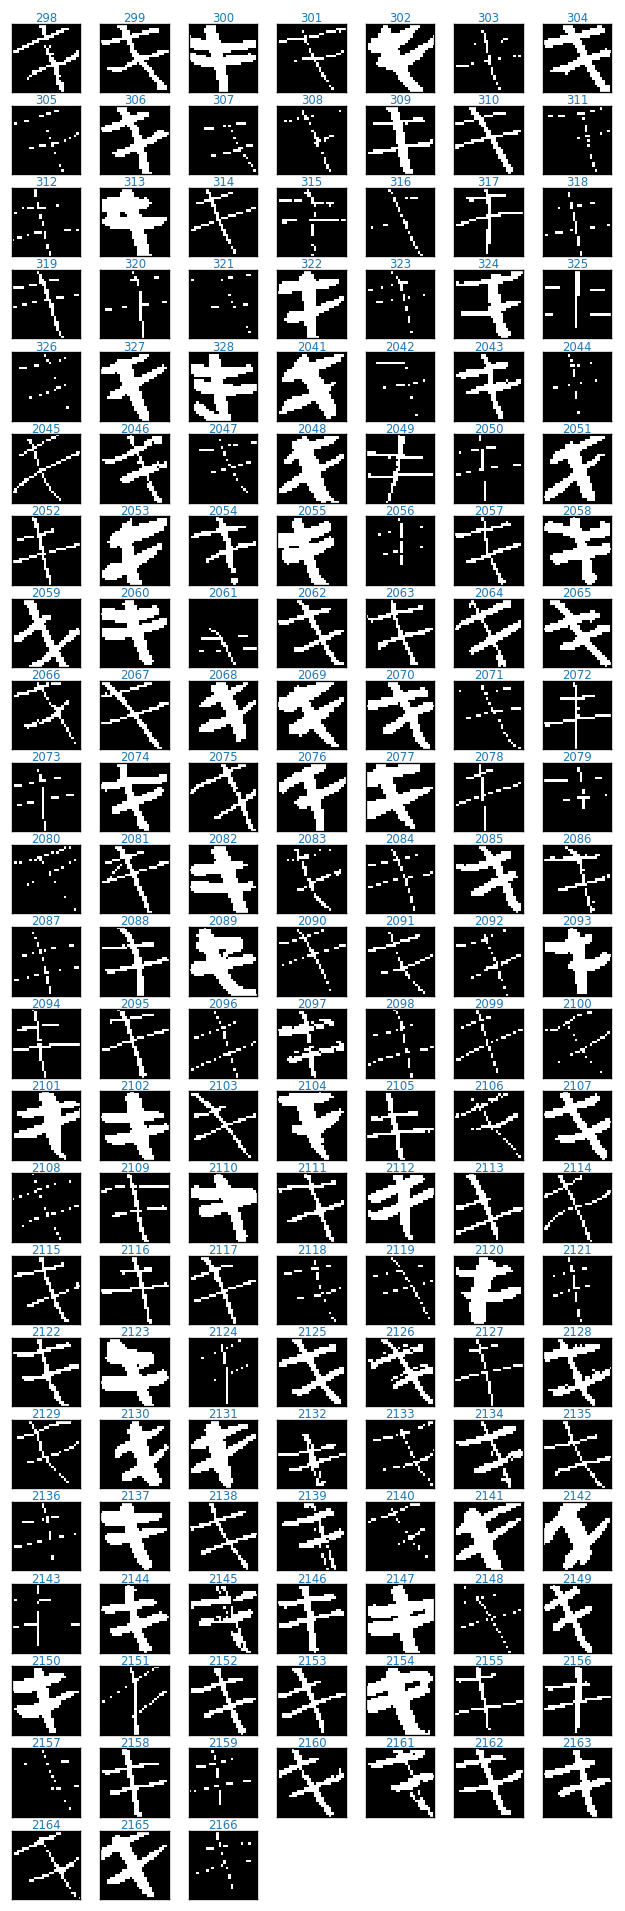

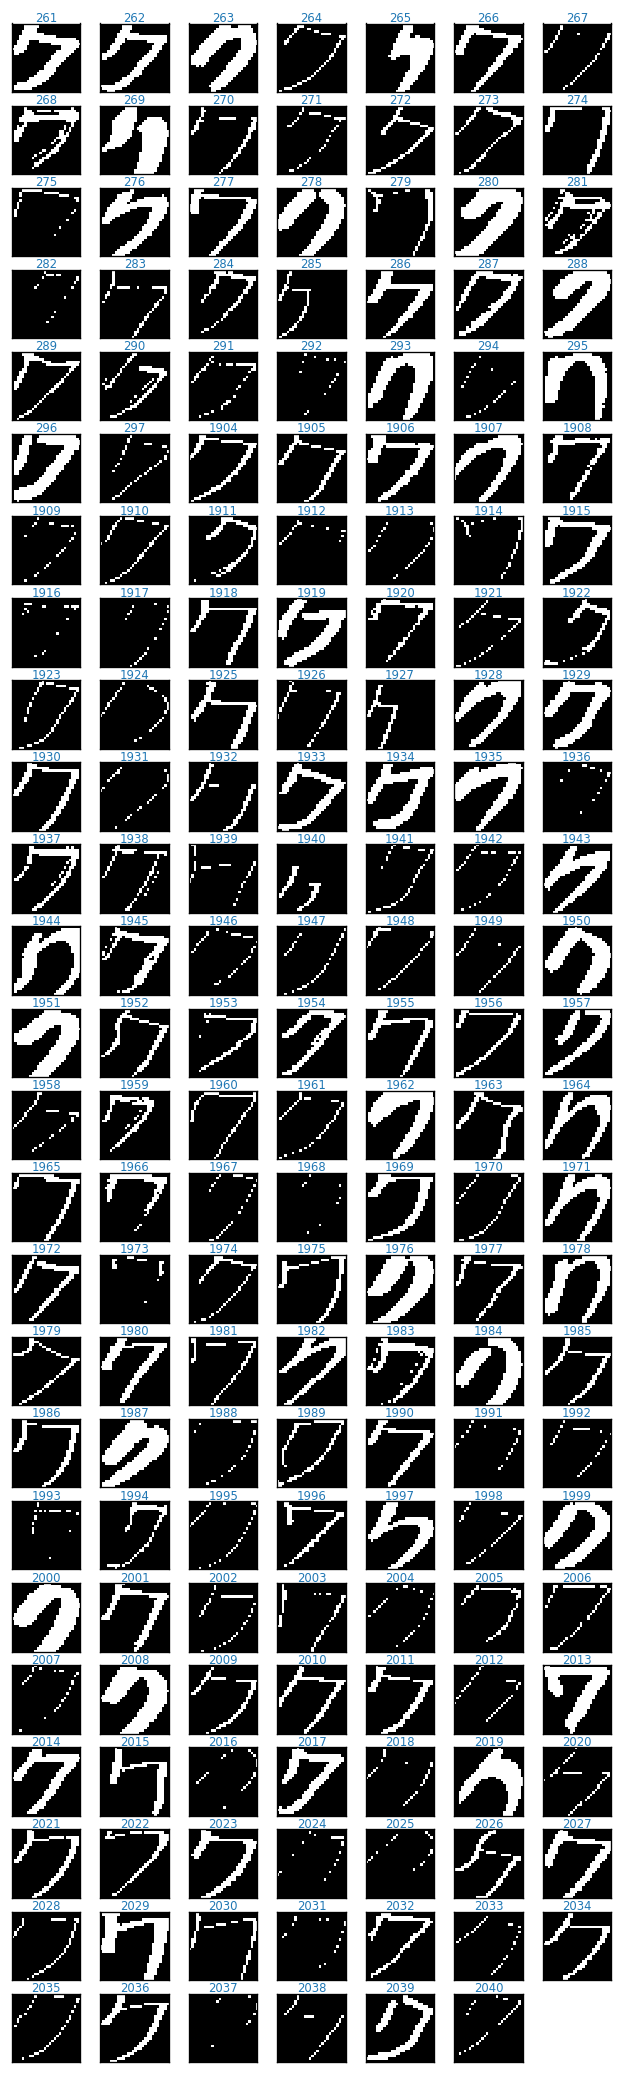

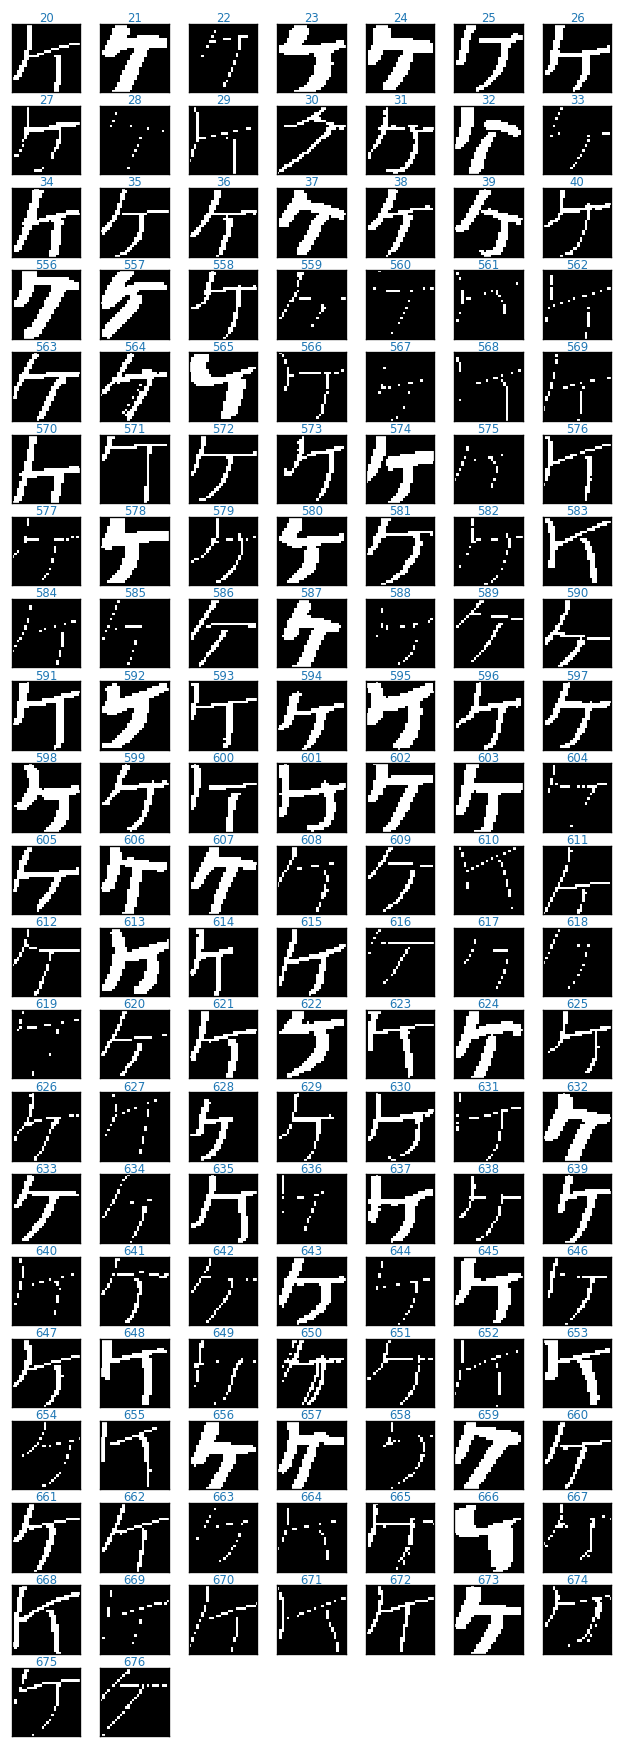

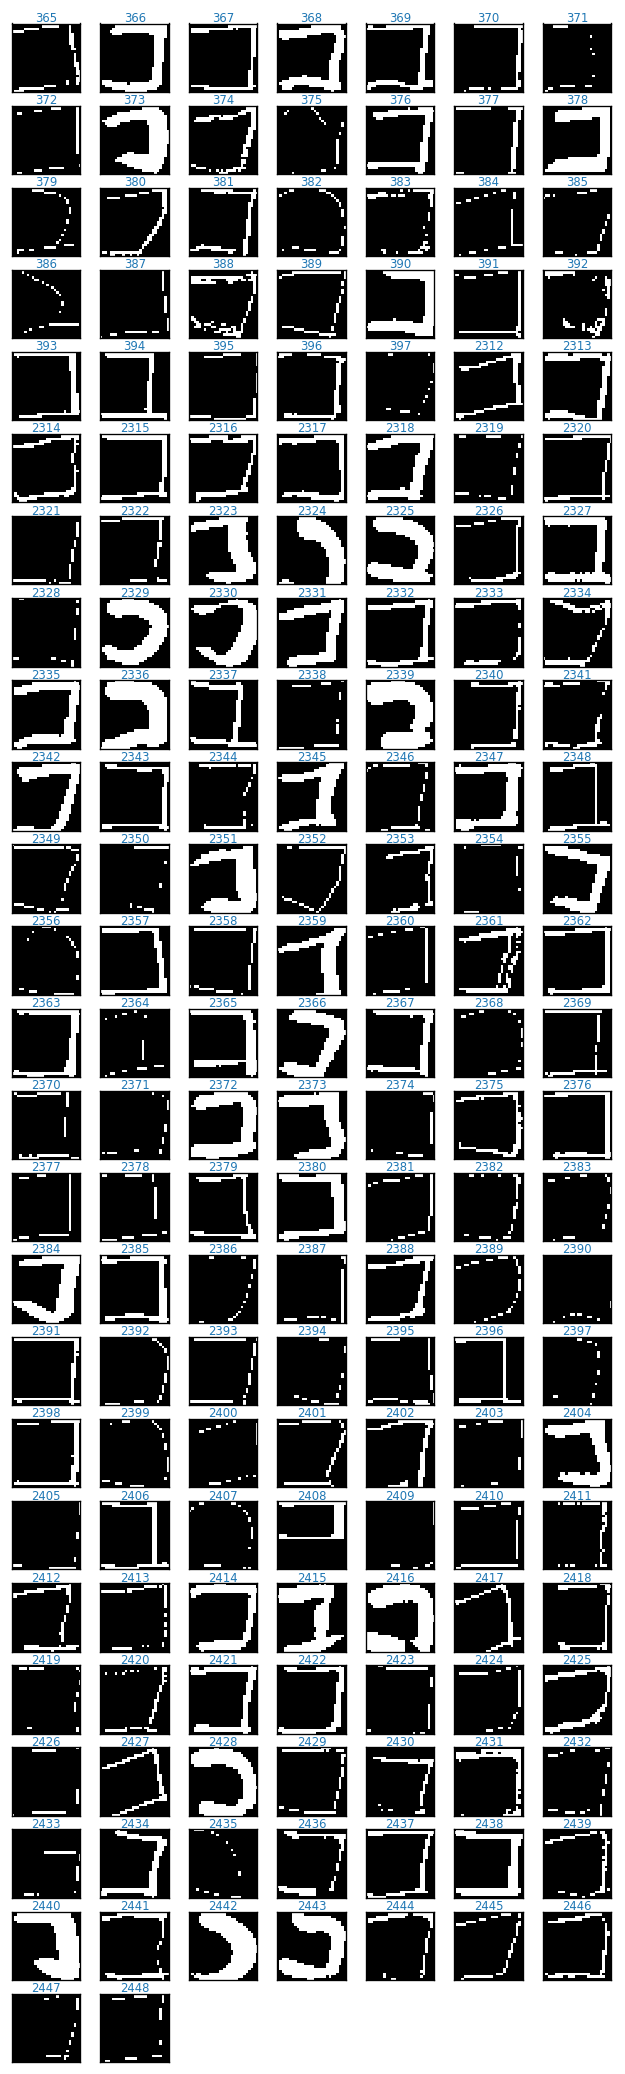

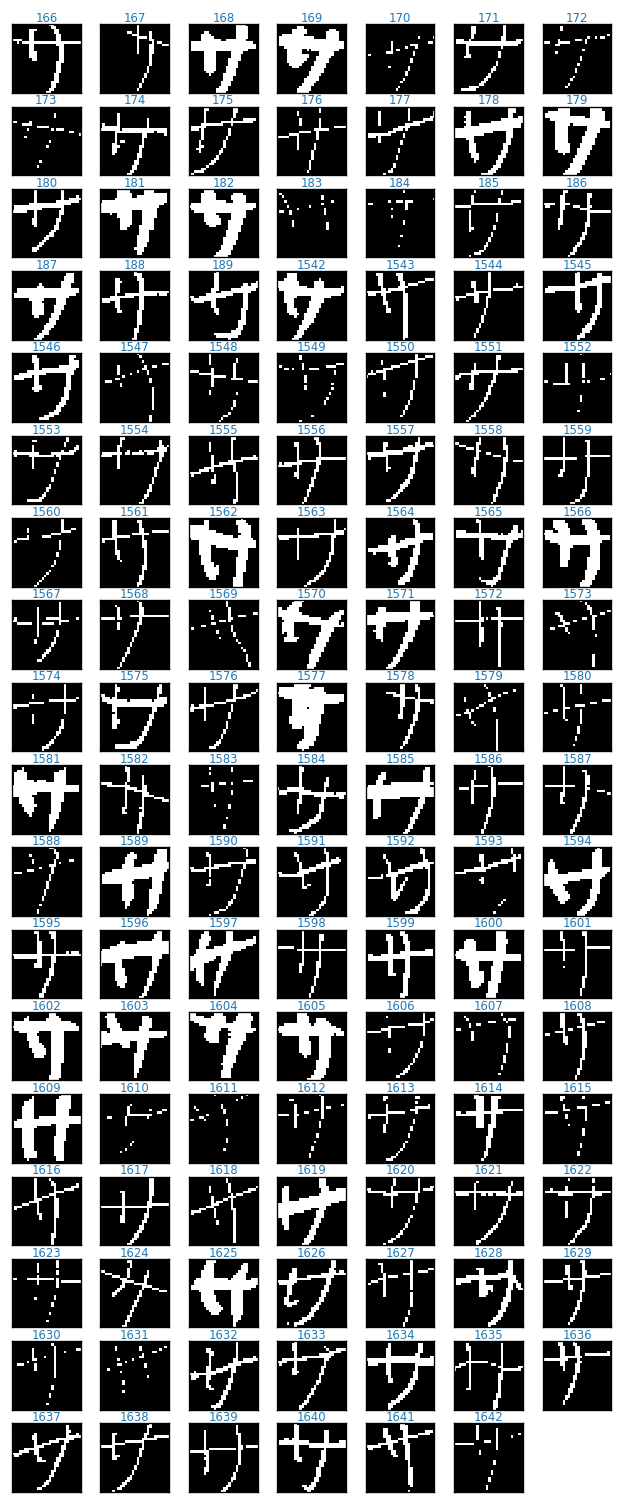

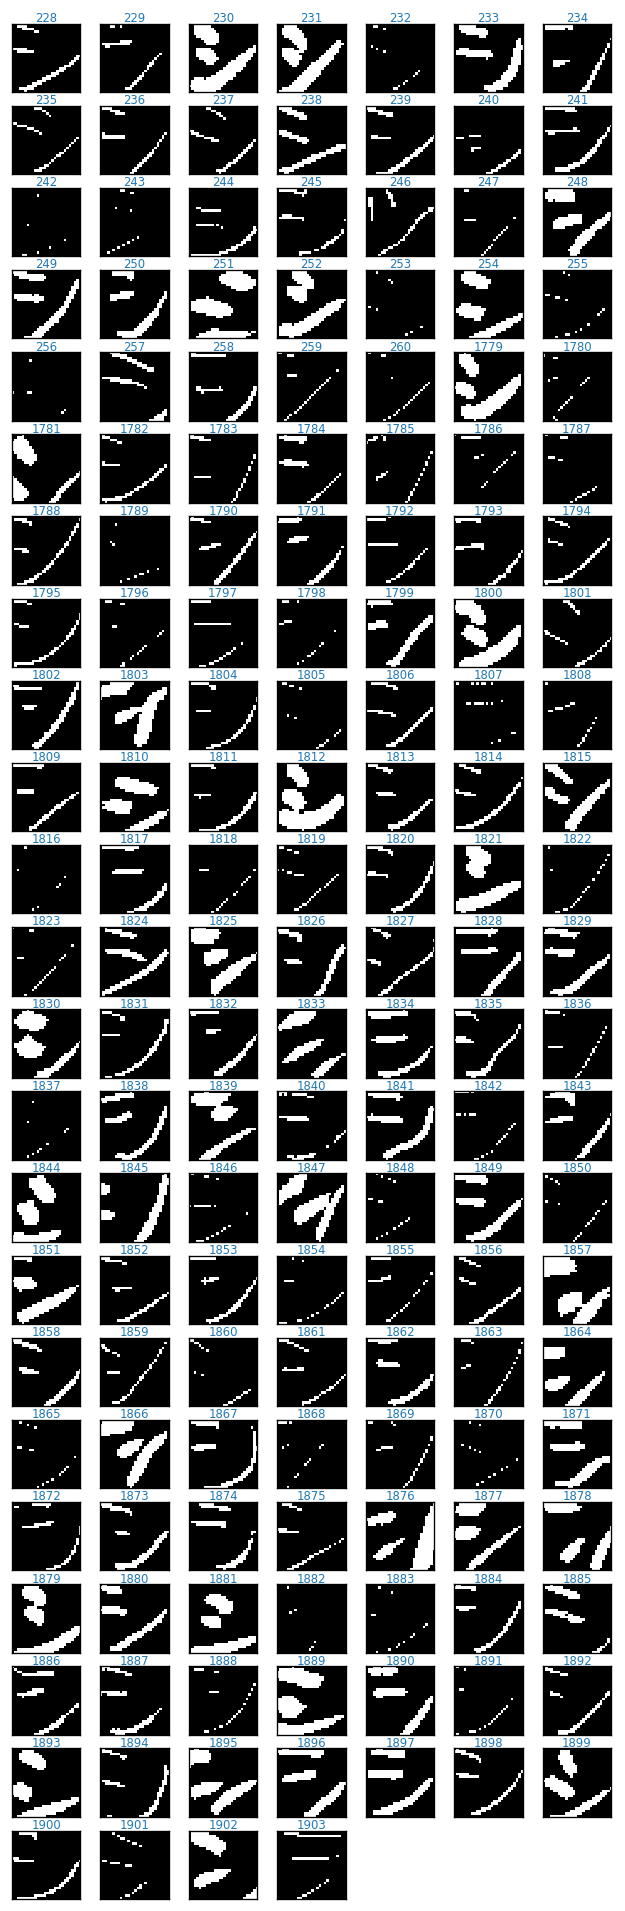

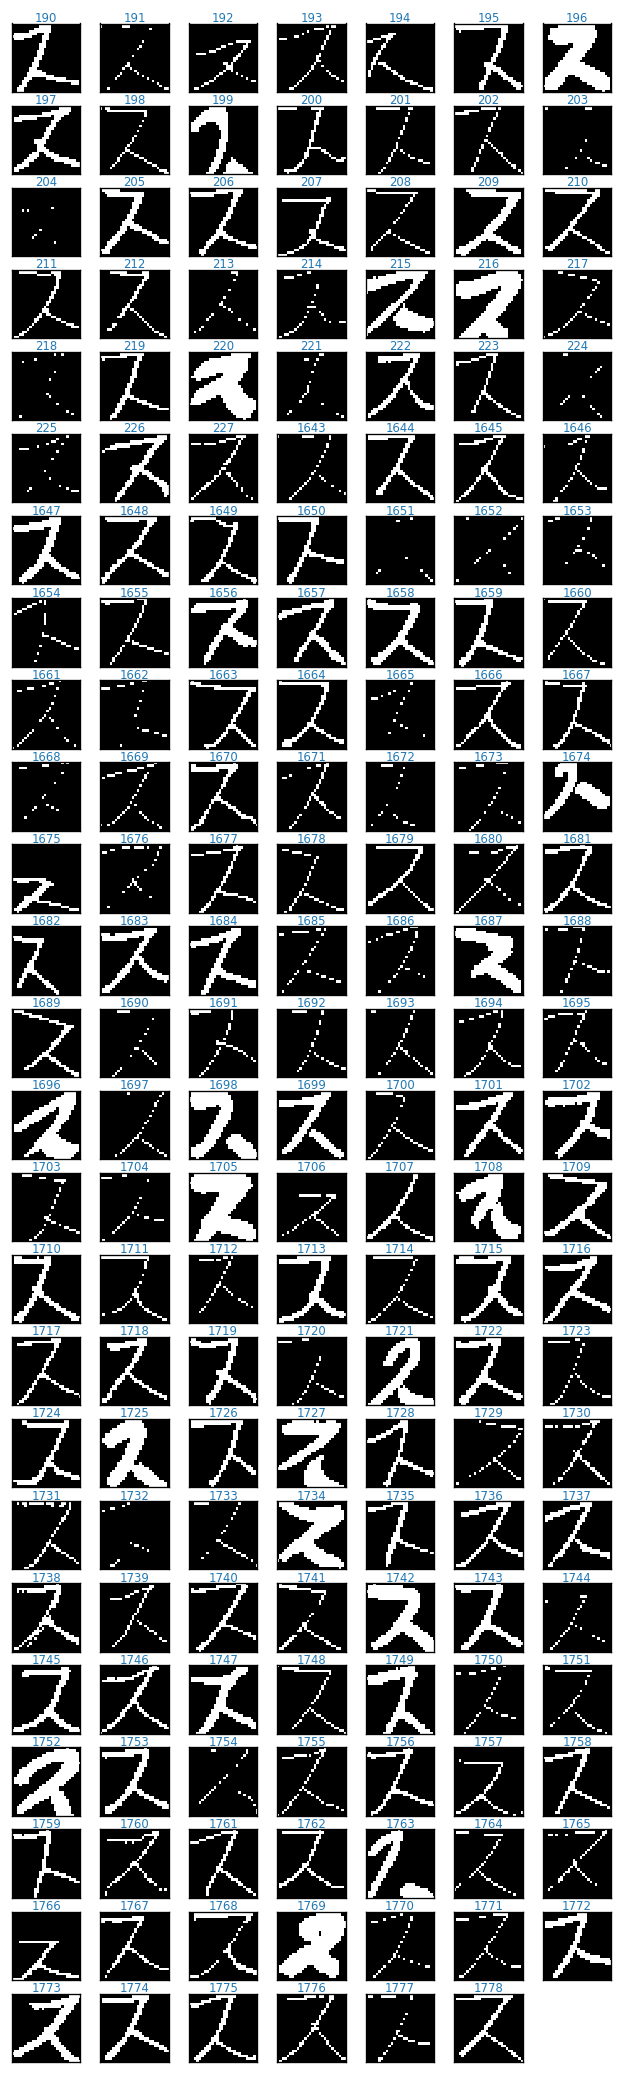

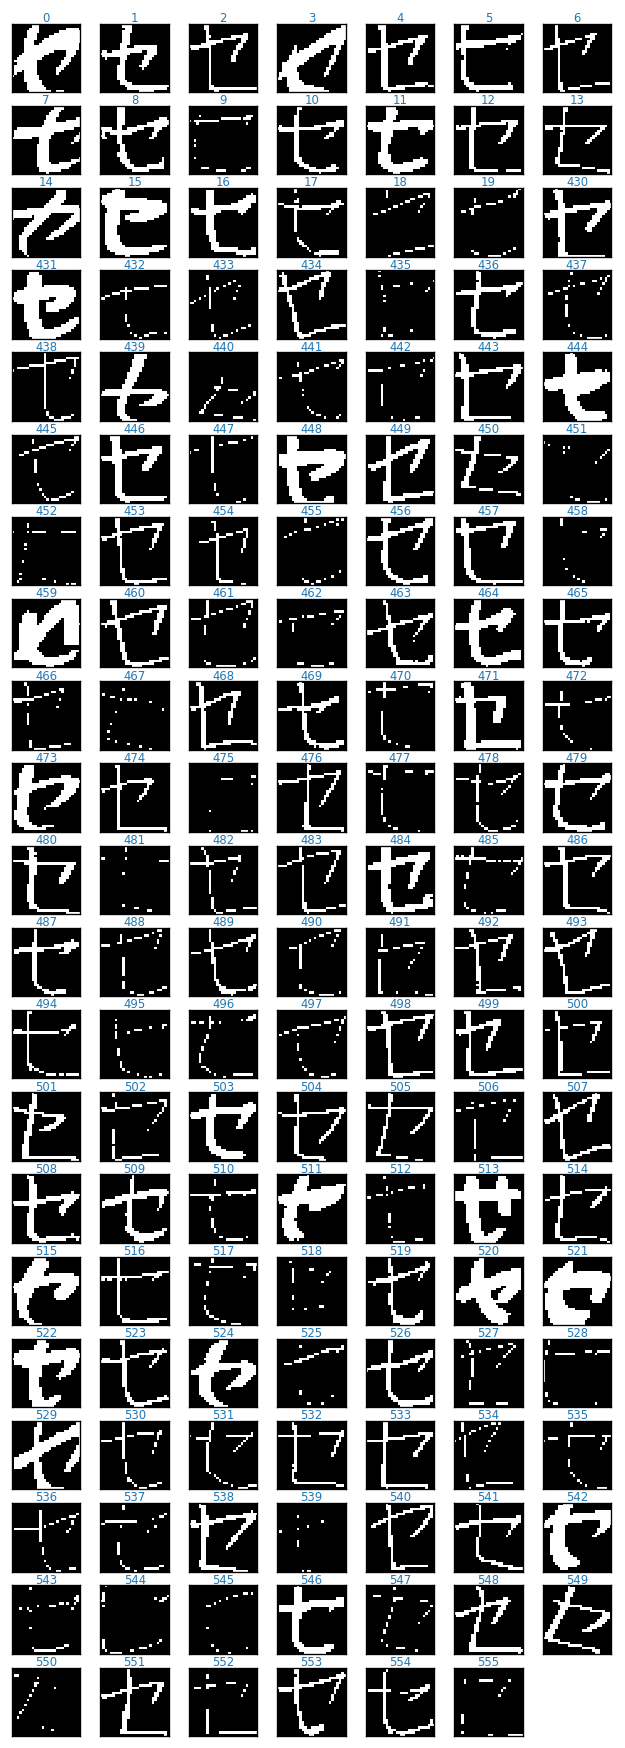

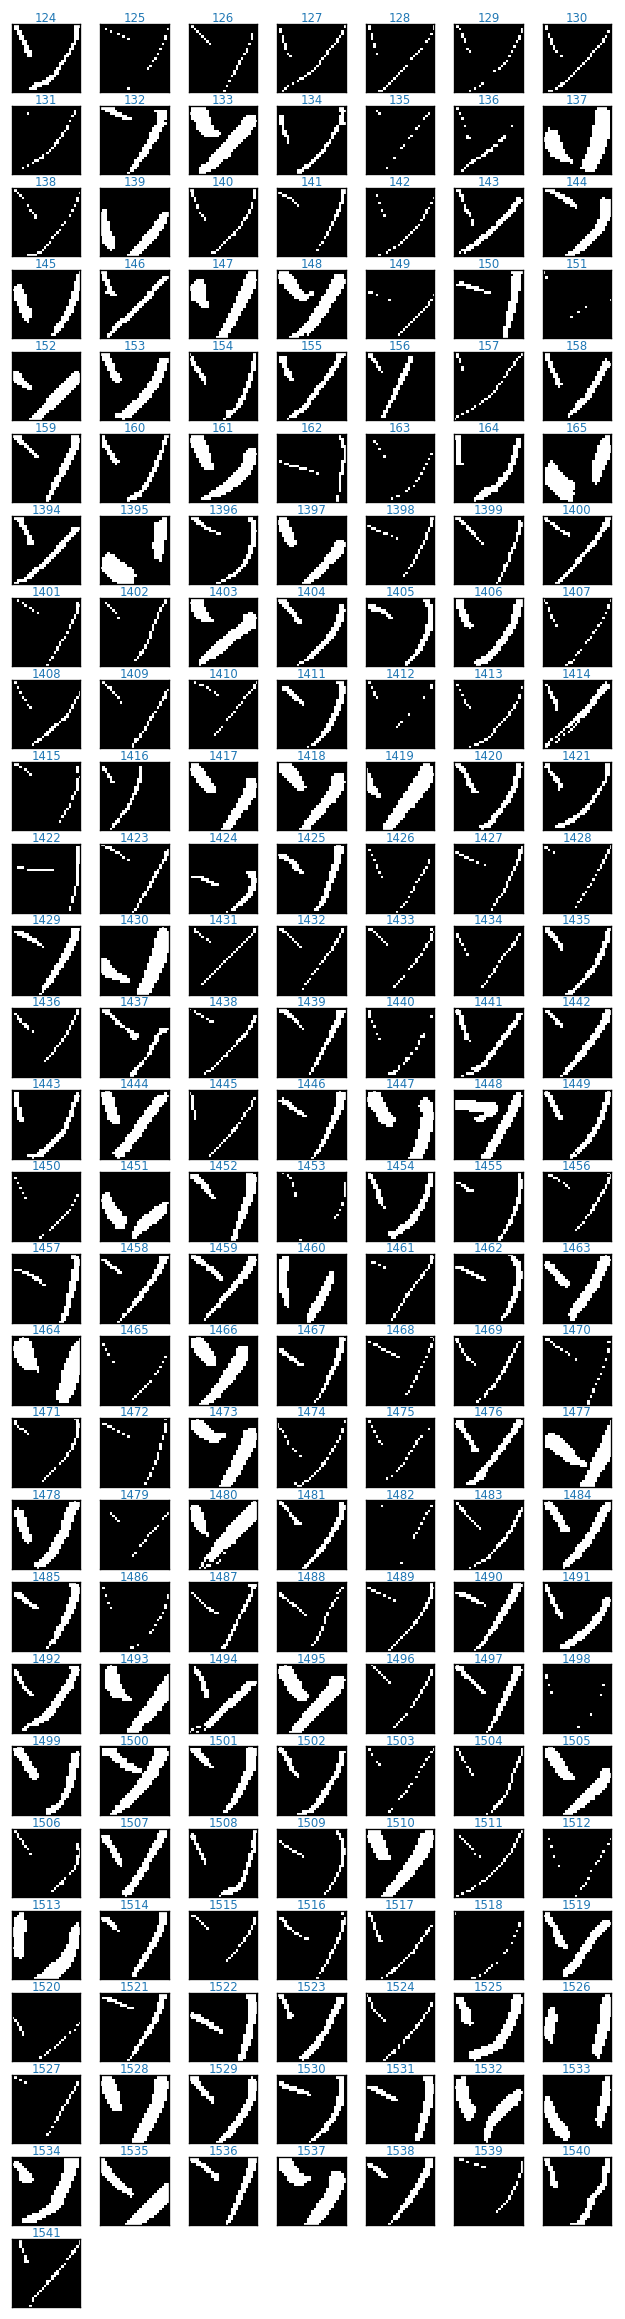

In [5]:
for t in range(0,15):

  # 正解値が t の行を抽出
  index_list = list(df[df['label_id']==t].index.values)

  # matplotlib 出力
  n_cols = 7
  n_rows = ((len(index_list)-1)//n_cols)+1
  fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6.5, 0.9*n_rows), dpi=120)
  for i,ax in enumerate( np.ravel(ax) ):
    if i < len(index_list):

      p = index_list[i]
      ax.imshow(train_data_image[p],interpolation='nearest',vmin=0.,vmax=1.,cmap='Greys')

#       # 予測（分類）を左上に表示
#       t = ax.text(1, 1, f'{test_pred[9][p]}', verticalalignment='top', fontsize=8, color='tab:red')
#       t.set_path_effects([pe.Stroke(linewidth=2, foreground='white'), pe.Normal()]) 

#       # 予測（分離）に対応する出力層のニューロンの値を括弧で表示
#       t = ax.text(5, 2, f'({s_test[p].max():.1f})', verticalalignment='top', fontsize=6, color='tab:red')
#       t.set_path_effects([pe.Stroke(linewidth=2, foreground='white'), pe.Normal()]) 

      # 目盛などを非表示に
      ax.tick_params(axis='both', which='both', left=False, labelleft=False, 
                     bottom=False, labelbottom=False)

      # 青色でインデックスを表示
      ax.set_title(index_list[i],fontsize=7,pad=1.5,color='tab:blue')

    else :
      ax.axis('off') # 余白処理

  plt.show()

判別が難しいデータをデータセットから除外する

In [5]:
del_index_list = [405, 409, 2357, 2546, 2547,   # カ
                  2557, 2610, 2617, 2620, 2628,
                  2635, 2637, 2638, 2644, 2649,
                  2654, 2655, 2659, 2660, 2662, # カ
                  368, 379, 380, 384, 386,
                  388, 391, 2347, 2348,
                  2351, 2353, 2356, 2366, 2367, # キ
                  2373, 2388, 2391, 2398, 2400,
                  2403, 2404, 2407, 2411, 2415,
                  2416, 2423, 2427, 2437,
                  2438, 2441, 2443, 2445, 2448,
                  2454, 2458, 2462, 2477, 2480,
                  2486, 2489, 2499, 2501, # キ
                  321, 322, 345, 346, 362, # ク
                  363, 2195, 2201, 2216, 2236,
                  2240, 2250, 2251, 2253, 2262,
                  2263, 2277, 2285, 2292, 2311,
                  2316, 2328, 2333, 2337, 2342,
                  2345, # ク
                  42, 43, 44, 45, 52, # ケ
                  53, 54, 55, 56, 60,
                  61, 66, 68, 676, 677,
                  679, 682, 687, 695, 697,
                  699, 701, 705, 709, 711,
                  717, 721, 724, 725, 727,
                  736, 737, 738, 747, 749,
                  759, 761, 763, 764, 765,
                  768, 770, 774, 776, 780,
                  786, 792, 794, 799, 800,
                  808, 811, 818, 820, 826,
                  828, 830, 838, # ケ
                  447, 456, 461, 469, 473, # コ
                  2684, 2685, 2692, 2695, 2708,
                  2714, 2715, 2720, 2727, 2729,
                  2734, 2735, 2745, 2754, 2764,
                  2772, 2776, 2789, 2793, 2795,
                  2814, 2818, 2820, 2825, 2828, # コ
                  198, 199, 201, 210, 211, # サ
                  212, 215, 216, 219, 225,
                  226, 229, 230, 232, 236,
                  1713, 1718, 1722, 1725, 1727,
                  1730, 1731, 1732, 1733, 1734,
                  1736, 1738, 1743, 1744, 1745,
                  1751, 1752, 1753, 1754, 1756,
                  1762, 1763, 1766, 1767, 1775,
                  1780, 1781, 1783, 1787, 1791,
                  1796, 1797, 1798, 1801, 1807,
                  1808, 1810, 1811, 1814, 1816,
                  1820, 1823, 1825, 1827, 1831,
                  1832, 1833, 1836, 1837, 1838,
                  1840, 1841, 1845, 1846, 1849,
                  1859, 1860, 1862, 1865, 1871, # サ
                  290, 293, 295, 299, 302, # シ
                  309, 310, 319, 2031, 2037,
                  2040, 2041, 2051, 2066, 2069,
                  2071, 2084, 2086, 2087, 2088,
                  2096, 2107, 2111, 2114, 2121,
                  2122, 2124, 2126, 2135, 2139,
                  2141, 2142, 2148, 2149, 2158,
                  2159, 2169, 2170, 2171, 2176,
                  2180, 2185, # シ
                  247, 249, 251, 268, 274, # ス
                  1880, 1891, 1893, 1895, 1898,
                  1902, 1905, 1913, 1916, 1918,
                  1919, 1921, 1924, 1959, 1970,
                  1999, 2000, 2001, 2013, 2026,
                  2027, # ス
                  3, 4, 5, 7, 8, # セ
                  9, 11, 12, 15, 16,
                  17, 20, 24, 26, 31,
                  31, 32, 34, 520, 524,
                  528, 531, 535, 540, 543,
                  546, 548, 550, 551, 555,
                  558, 559, 568, 569, 577,
                  580, 581, 584, 594, 597,
                  600, 606, 610, 617, 622,
                  630, 633, 638, 642, 645,
                  647, 648, 655, 669, 671, # セ
                  189, 195, 1593, 1624, 1646, # シ
                  1649, 1650, 1658, 1700, 1701] # シ

In [17]:
print(len(del_index_list))

384


In [16]:
label_w_pre_prcss = []
data_w_pre_prcss = []

for i in range(len(label)):
    if i not in del_index_list:
        label_w_pre_prcss.append(label[i])
        data_w_pre_prcss.append(data[i])

label_w_pre_prcss = np.array(label_w_pre_prcss)
data_w_pre_prcss = np.array(data_w_pre_prcss)
print(label_w_pre_prcss)
print(label_w_pre_prcss.shape)
print(data_w_pre_prcss)
print(data_w_pre_prcss.shape)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(2617, 15)
[[[[254. 254. 254. ... 255. 255. 254.]
   [254. 254. 254. ... 176. 255. 255.]
   [254. 254. 254. ...   0.   0. 255.]
   ...
   [254. 254. 254. ... 254. 254. 254.]
   [254. 254. 254. ... 254. 254. 254.]
   [254. 254. 254. ... 254. 254. 254.]]]


 [[[254. 254. 254. ... 254. 254. 254.]
   [254. 254. 254. ... 254. 254. 254.]
   [254. 254. 254. ... 254. 254. 254.]
   ...
   [254. 254. 254. ...   0.   0.   0.]
   [254. 254. 254. ...   0.   0.  67.]
   [254. 254. 254. ... 242. 255. 255.]]]


 [[[254. 254. 254. ... 254. 254. 254.]
   [254. 254. 254. ... 254. 254. 254.]
   [254. 254. 254. ... 253. 254. 254.]
   ...
   [254. 254. 254. ...  21.  10. 200.]
   [254. 254. 254. ...   0.   0.   0.]
   [254. 254. 254. ... 133.  39.  76.]]]


 ...


 [[[255. 255. 255. ... 255. 255. 255.]
   [  0.   0.   0. ... 255. 255. 255.]
   [  0.   0.   0. ... 255. 255. 255.]
   ...
   

In [ ]:
np.save('../1_data/train_data_w_pre_prcss.npy', data_w_pre_prcss)
np.save('../1_data/train_label_w_pre_prcss.npy', label_w_pre_prcss)